In [2]:
import numpy as np
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
with open('E:/gt30e020n40_dem/e020n40.dem') as fid:
 rectype = np.dtype('>i2')
 GTOPO30 = np.fromfile(fid, dtype=rectype)
GTOPO30 = np.reshape(GTOPO30,(6000,4800))
GTOPO30 = np.flipud(GTOPO30)
GTOPO30[GTOPO30<0] = 0

In [5]:
lon = np.linspace(20,60,4800)
lat = np.linspace(-10,40,6000)
LON,LAT = np.meshgrid(lon,lat)

C:\Users\arad7\AppData\Local\Temp\ipykernel_11852\3270004872.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  gray_r = cm.get_cmap('gray_r',256)


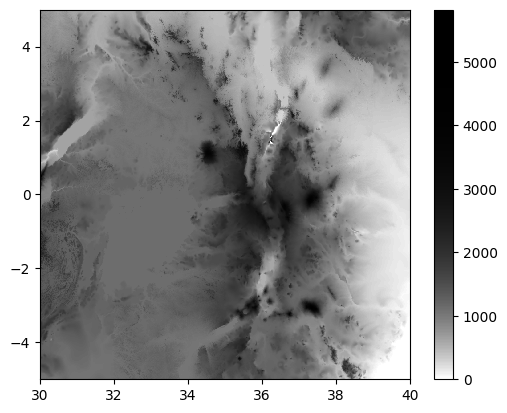

In [14]:
gray_r = cm.get_cmap('gray_r',256)
newcolors = gray_r(np.linspace(0,1,256))
newcolors = newcolors**4
newcmp = ListedColormap(newcolors)
plt.figure()
plt.axes(aspect='equal',
 xlim=(30,40),
 ylim=(-5,5))
plt.pcolormesh(LON,LAT,GTOPO30,
 cmap=newcmp,
 shading='auto')
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

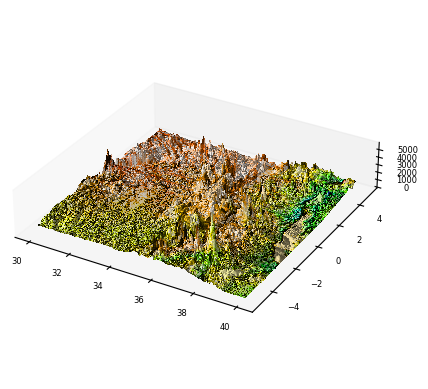

In [15]:
plt.figure()
fig,ax2 = plt.subplots(subplot_kw={"projection":"3d"})
ax2.set_box_aspect((1,1,0.2))
ls = LightSource(270,45)
rgb = ls.shade(GTOPO30,
 cmap=cm.hsv,
 vert_exag=1,
 blend_mode='hsv')
ax2.plot_surface(LON[600:1800,1200:2400],
 LAT[600:1800,1200:2400],
 GTOPO30[600:1800,1200:2400],
 rstride=1,
 cstride=1,
 linewidth=0,
 facecolors=rgb,
 antialiased=False,
 shade=True)
ax2.tick_params(axis='both',labelsize=6)
ax2.grid(False)
plt.savefig('gtopo30_python.png',dpi=300)
plt.show()